In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')


ModuleNotFoundError: No module named 'tensorflow'

In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('addhar_centers.csv')
df.head()

,gid,state,lat,long
0,4233336,Maharashtra,17.0076,74.2615
1,4233337,Tamil Nadu,10.7886,79.1310
2,4233338,Karnataka,16.1655,74.8214
3,4233339,Andhra Pradesh,16.1849,81.1353
4,4233340,Tripura,23.9967,91.9957


In [6]:
print(type(df['long'][0]))

<class 'numpy.float64'>


In [1]:
!pip install scikit-learn


  Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl (42.2 MB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
    --------------------------------------- 0.2/9.3 MB 2.6 MB/s eta 0:00:04
   ---- ----------------------------------- 1.0/9.3 MB 9.2 MB/s eta 0:00:01
   ------ --------------------------------- 1.4/9.3 MB 10.2 MB/s eta 0:00:01
   -------- ------------------------------- 1.9/9.3 MB 9.4 MB/s eta 0:00:01
   --------- ------------------------------ 2.3/9.3 MB 9.0 MB/s eta 0:00:01
   ----------- ---------------------------- 2.6/9.3 MB 9.0 MB/s eta 0:00:01
   ------------ --------------------------- 2.9/9.3 MB 8.7 MB/s eta 0:00:01
   ------------- -------------------------- 3.1/9.3 MB 8.4 MB/s eta 0:00:01
   -------------- ------------------------- 3.5/9.3 MB 7.

In [37]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Step 1: Load the CSV file containing your dataset
file_path = 'addhar_centers.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Step 2: Prepare the data
# Assuming your dataset has columns like 'latitude', 'longitude', 'state', and other relevant features.
# Replace 'feature1', 'feature2', ... with actual feature column names from your dataset.
features = ['state', 'lat', 'long']    # Update with actual feature names

# Define the feature matrix (X) and target variable (y)
X = data[features]
y = data[['lat', 'long']]  # You can adjust this based on how your data is structured.

# Preprocessing for numerical columns (impute missing values if any)
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))  # You can choose a different strategy if needed
])

# Preprocessing for categorical columns (one-hot encoding)
categorical_cols = ['state']  # Add more categorical columns if needed
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

# Step 3: Model Training
clf.fit(X, y)

# Step 4: Predict future locations
# For predicting new locations, provide input features similar to the ones in your dataset
new_data = [['state','lat', 'long']]  # Replace with new feature values and state

# Make predictions for the new data
predicted_locations = clf.predict(new_data)

# The 'predicted_locations' variable now contains the predicted latitude and longitude.
print(f'Predicted Location (Latitude, Longitude): {predicted_locations}')


ValueError: Specifying the columns using strings is only supported for pandas DataFrames

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

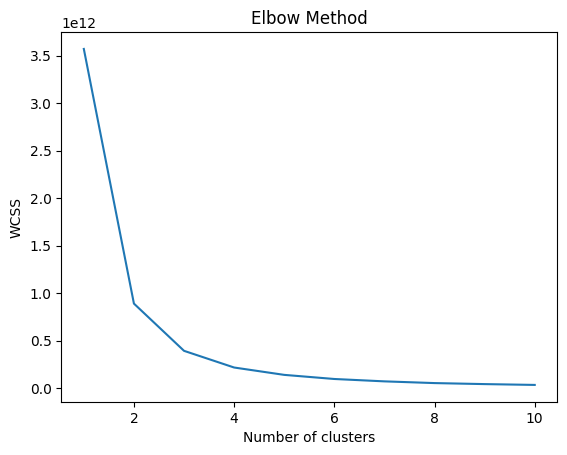

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the CSV file
file_path = 'addhar_centers.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Step 2: Data Preprocessing
# If the dataset is large, consider taking a sample
sample_data = data.sample(frac=0.1)  # Adjust the fraction as per your need

# Convert 'state' to numerical values
label_encoder = LabelEncoder()
sample_data['state_encoded'] = label_encoder.fit_transform(sample_data['state'])

# Selecting features
features = ['gid', 'state_encoded', 'lat', 'long']  # Updated with actual feature names
X = sample_data[features]

# Step 3: Choosing the Number of Clusters (k)
# Use the Elbow method to find a good number of clusters (k)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe the elbow
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

# Step 4: Applying K-Means to the dataset
# Choose the number of clusters based on the elbow method
n_clusters = 3  # Replace with the chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Note: Visualizing the clusters might be challenging as you have more than 2 features
# You can use dimensionality reduction techniques like PCA for visualization in a 2D space


C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

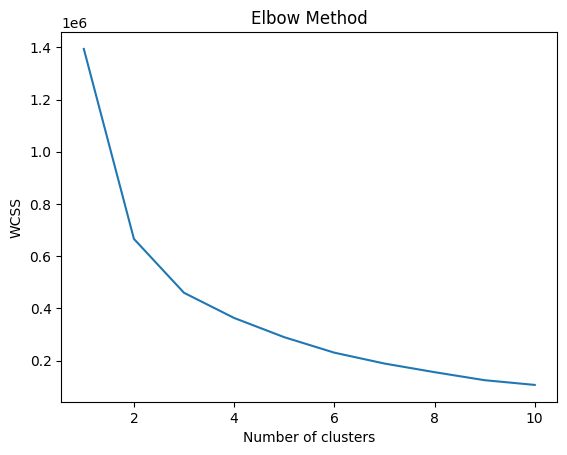

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


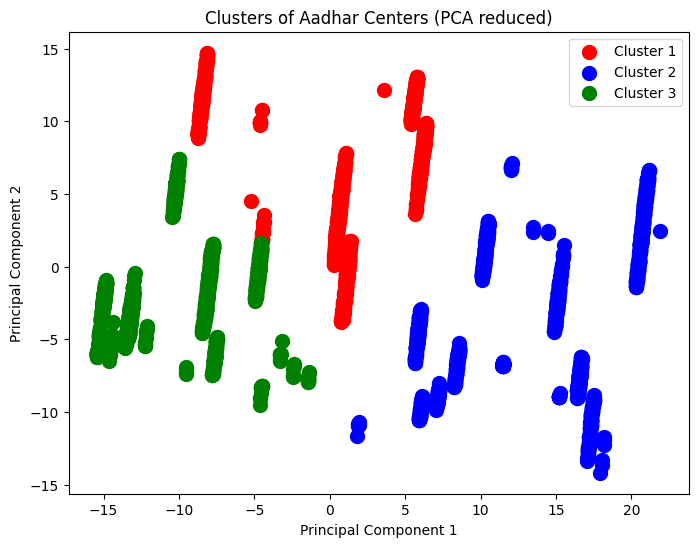

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# Step 1: Load the CSV file
file_path = 'addhar_centers.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Step 2: Data Preprocessing
# If the dataset is large, consider taking a sample
sample_data = data.sample(frac=0.1)  # Adjust the fraction as per your need

# Convert 'state' to numerical values
label_encoder = LabelEncoder()
sample_data['state_encoded'] = label_encoder.fit_transform(sample_data['state'])

# Selecting features, excluding 'gid'
features = ['state_encoded', 'lat', 'long']
X = sample_data[features]

# Step 3: Choosing the Number of Clusters (k)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Step 4: Applying K-Means to the dataset
n_clusters = 3  # Replace with the chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 5: Applying PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 6: Visualizing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.title('Clusters of Aadhar Centers (PCA reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

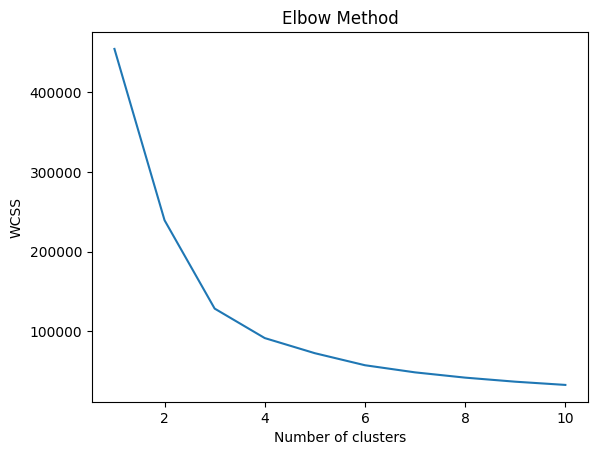

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


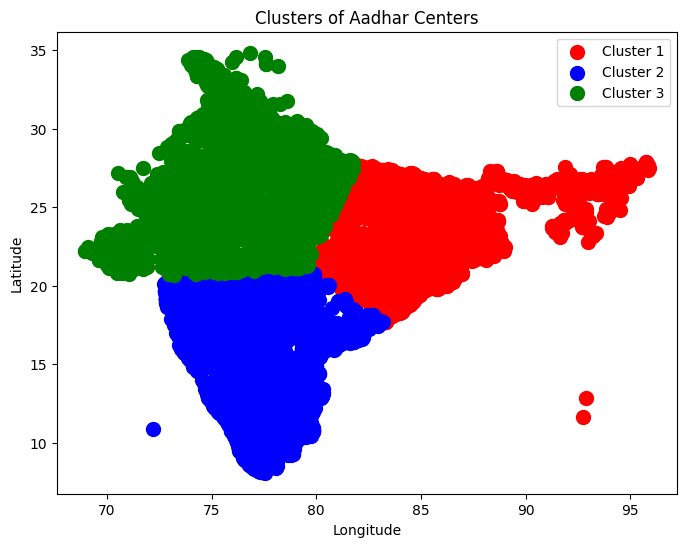

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the CSV file
file_path = 'addhar_centers.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Step 2: Data Preprocessing
# If the dataset is large, consider taking a sample
sample_data = data.sample(frac=0.1)  # Adjust the fraction as per your need

# Convert 'state' to numerical values (if needed)
label_encoder = LabelEncoder()
sample_data['state_encoded'] = label_encoder.fit_transform(sample_data['state'])

# Using only 'latitude' and 'longitude' for clustering
X = sample_data[['lat', 'long']]

# Step 3: Choosing the Number of Clusters (k)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Step 4: Applying K-Means to the dataset
n_clusters = 3  # Replace with the chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 5: Visualizing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['long'][y_kmeans == 0], X['lat'][y_kmeans == 0], s=100, c='red', label='Cluster 1')
plt.scatter(X['long'][y_kmeans == 1], X['lat'][y_kmeans == 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X['long'][y_kmeans == 2], X['lat'][y_kmeans == 2], s=100, c='green', label='Cluster 3')
plt.title('Clusters of Aadhar Centers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


Not enough data points in Andaman and Nicobar Islands for clustering.


C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

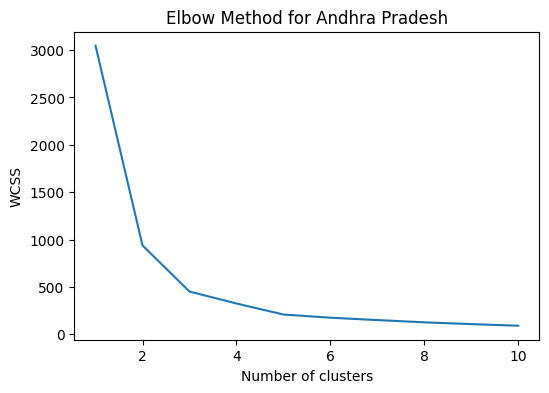

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


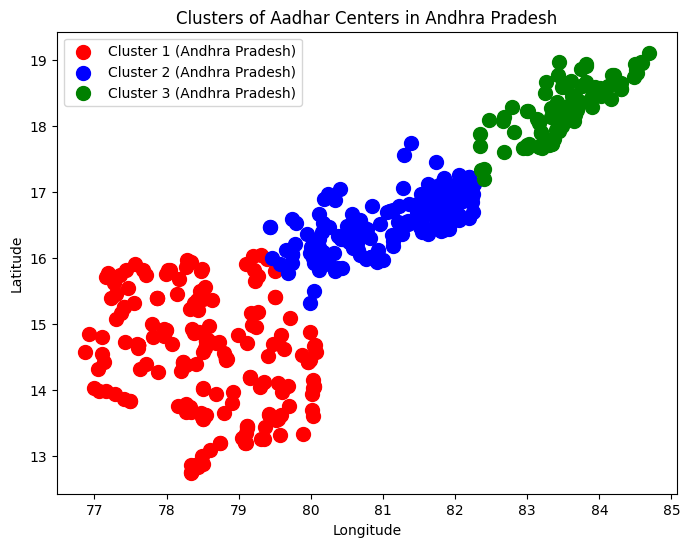

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

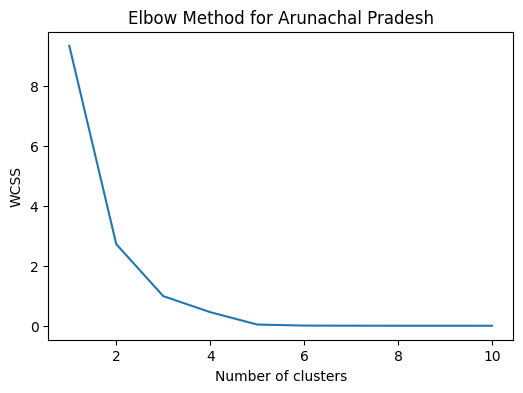

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


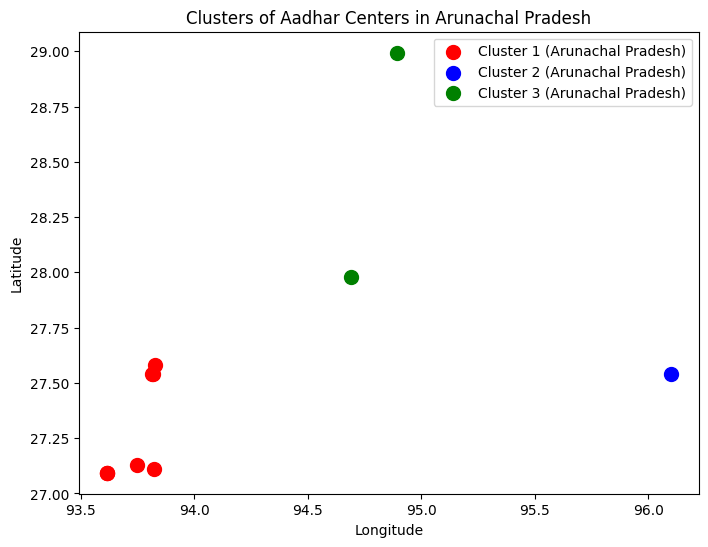

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

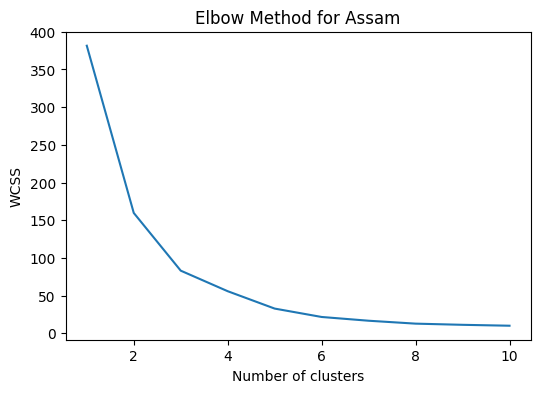

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


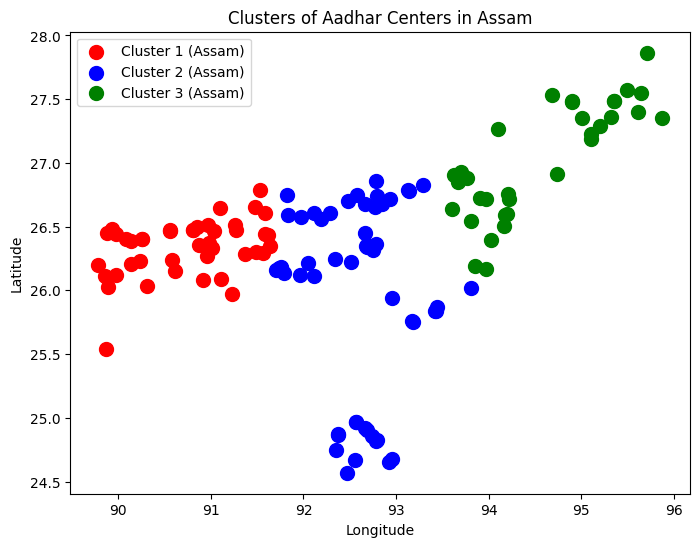

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

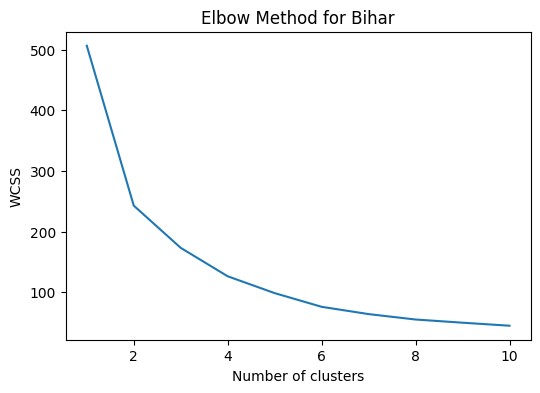

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


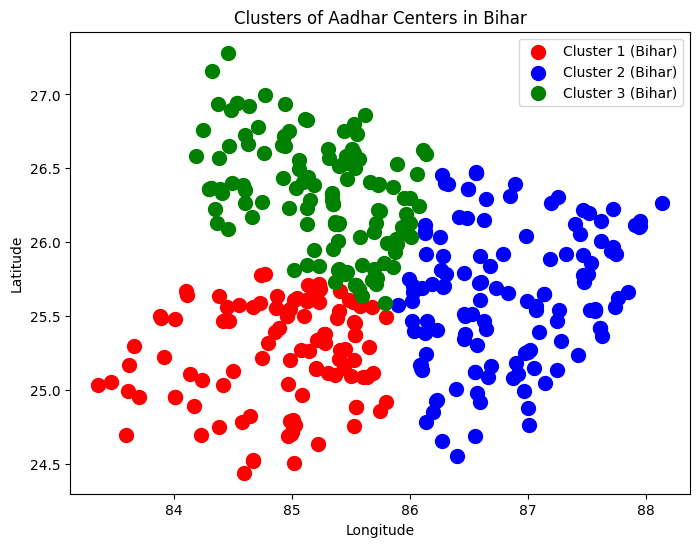

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

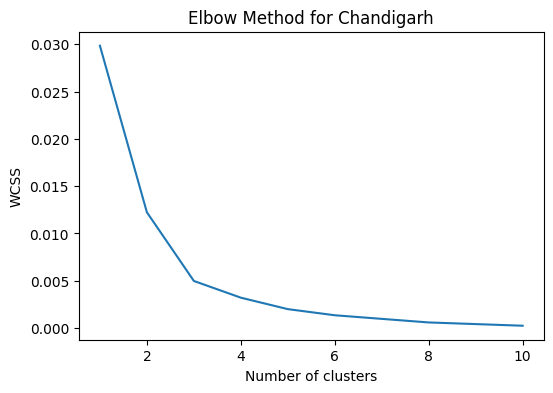

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


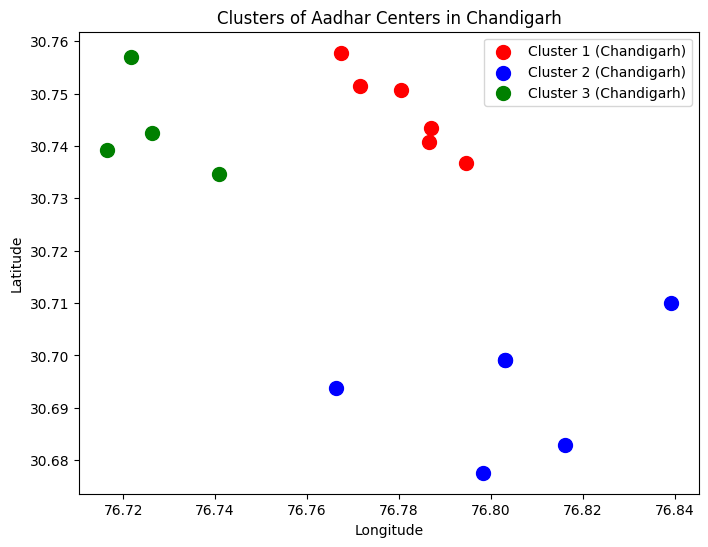

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

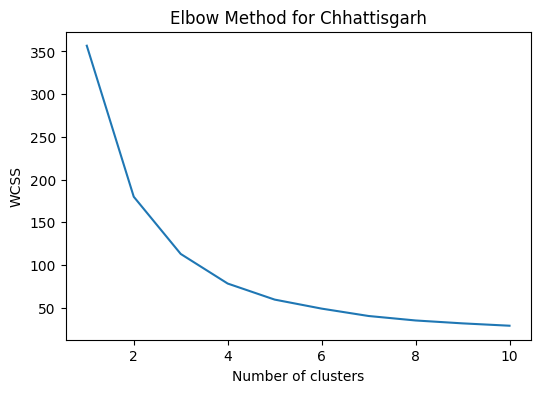

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


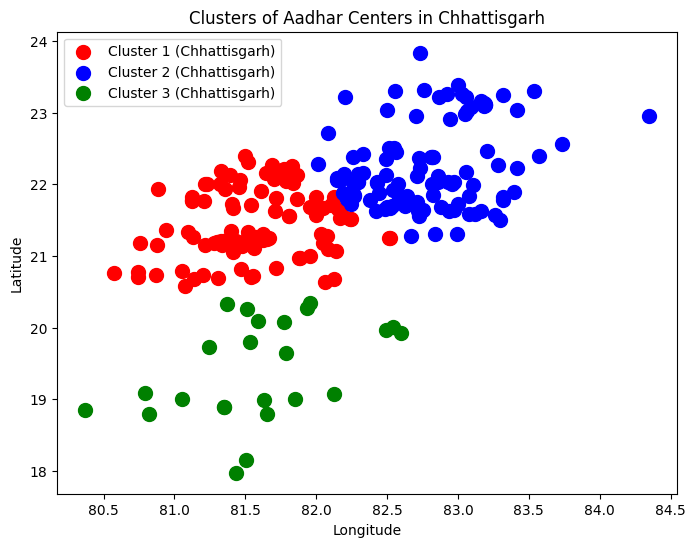

Not enough data points in Dadra and Nagar Haveli for clustering.


C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

ValueError: n_samples=7 should be >= n_clusters=8.

In [10]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load the CSV file
file_path = 'addhar_centers.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Step 2: Data Preprocessing
# If the dataset is large, consider taking a sample
sample_data = data.sample(frac=0.1)  # Adjust the fraction as per your need

# Grouping the data by 'state'
grouped_data = sample_data.groupby('state')

# Step 3: Clustering for Each State
for state, state_data in grouped_data:
    # Using only 'latitude' and 'longitude' for clustering
    X = state_data[['lat', 'long']]

    # Determine the number of clusters based on the number of data points
    n_data_points = len(X)
    
    if n_data_points < 3:
        print(f"Not enough data points in {state} for clustering.")
        continue

    if n_data_points < 6:
        n_clusters = n_data_points
    else:
        n_clusters = 3  # Default number of clusters

    # Choosing the Number of Clusters (k) using the Elbow method (if n_clusters > 1)
    if n_clusters > 1:
        wcss = []
        for i in range(1, 11):
            kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
            kmeans.fit(X)
            wcss.append(kmeans.inertia_)

        # Plotting the Elbow Method for this state
        plt.figure(figsize=(6, 4))
        plt.plot(range(1, 11), wcss)
        plt.title(f'Elbow Method for {state}')
        plt.xlabel('Number of clusters')
        plt.ylabel('WCSS')  # Within cluster sum of squares
        plt.show()

        # Choosing the number of clusters (n_clusters) based on the elbow method plot
        n_clusters = 3  # Replace with the chosen number of clusters for this state

    # Applying K-Means to the dataset for this state
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    # Visualizing the clusters for this state
    plt.figure(figsize=(8, 6))
    plt.scatter(X['long'][y_kmeans == 0], X['lat'][y_kmeans == 0], s=100, c='red', label=f'Cluster 1 ({state})')
    plt.scatter(X['long'][y_kmeans == 1], X['lat'][y_kmeans == 1], s=100, c='blue', label=f'Cluster 2 ({state})')
    plt.scatter(X['long'][y_kmeans == 2], X['lat'][y_kmeans == 2], s=100, c='green', label=f'Cluster 3 ({state})')
    plt.title(f'Clusters of Aadhar Centers in {state}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.show()


Not enough data points in Andaman and Nicobar Islands for clustering.


C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


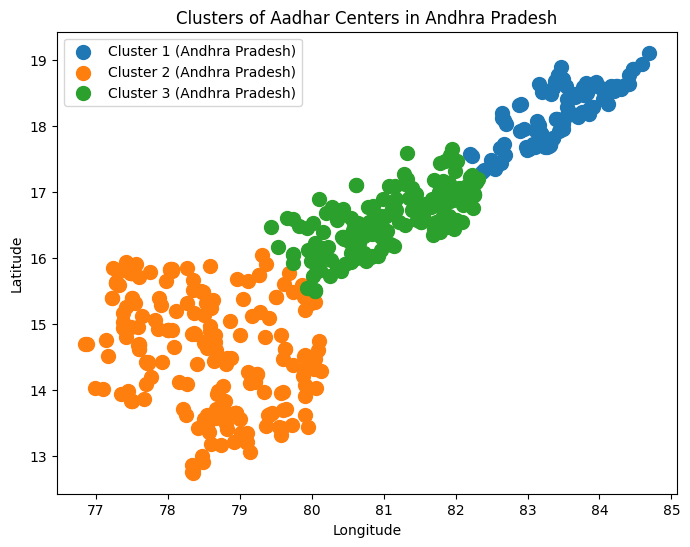

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


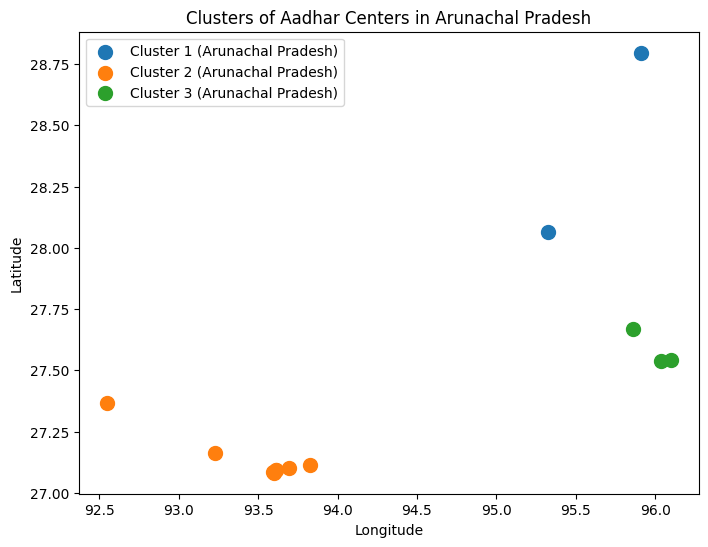

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


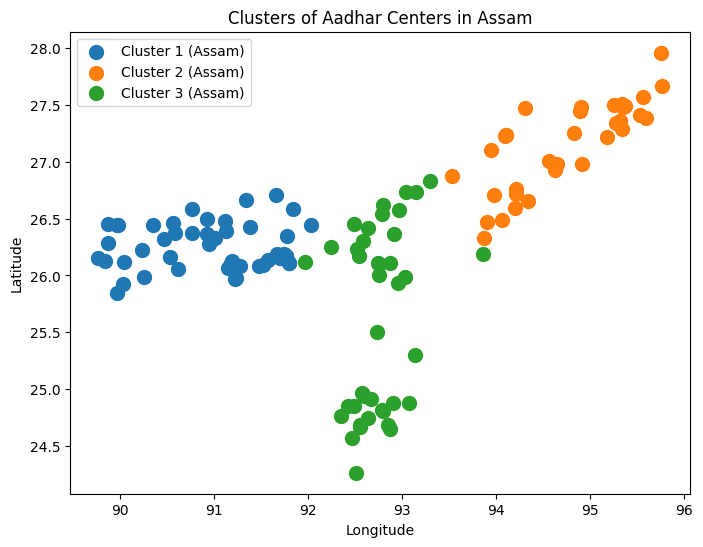

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


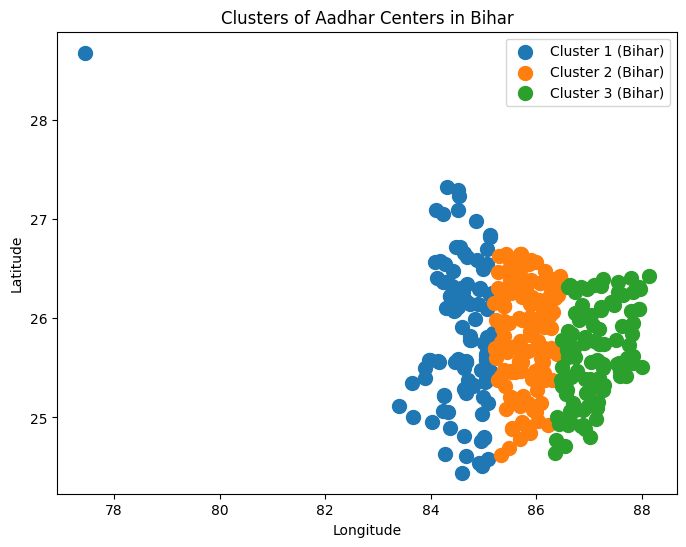

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


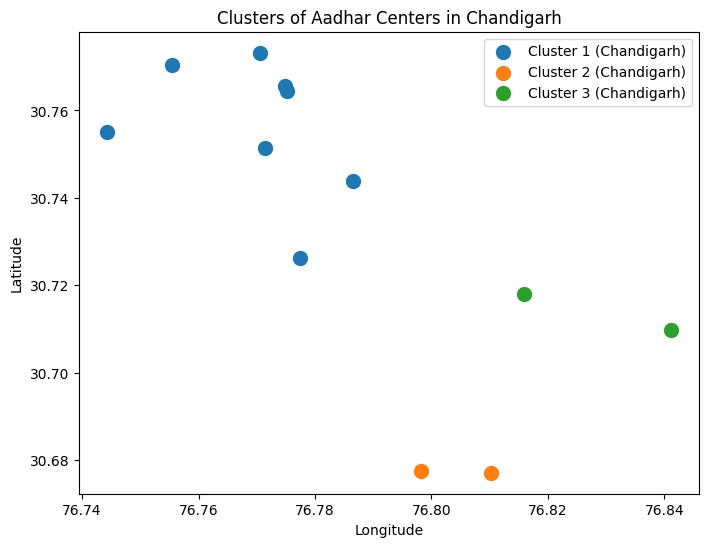

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


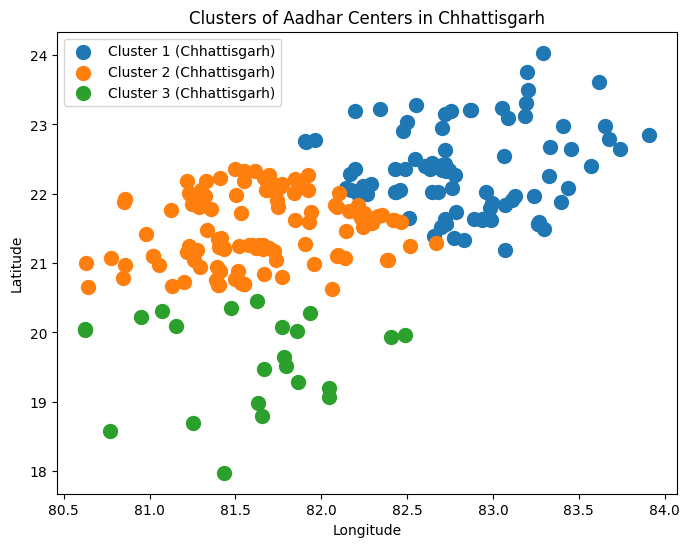

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


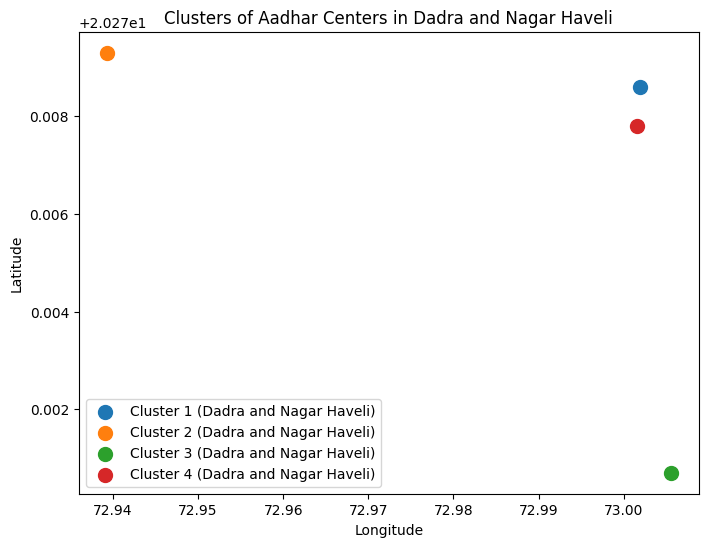

Not enough data points in Daman and Diu for clustering.


C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


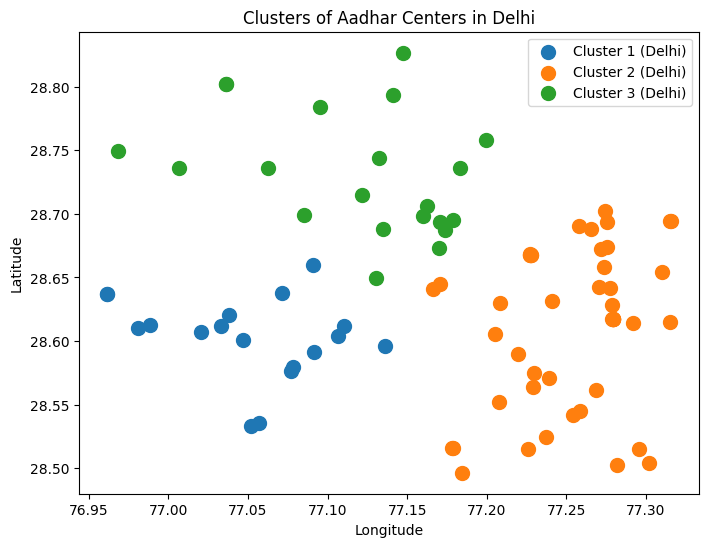

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


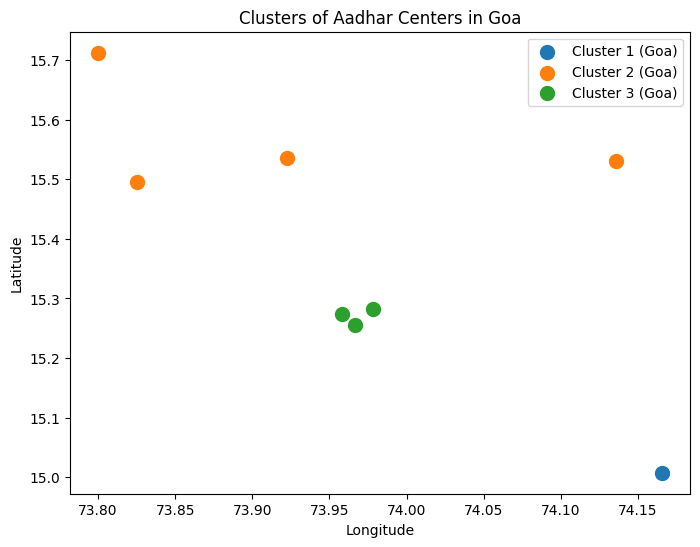

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


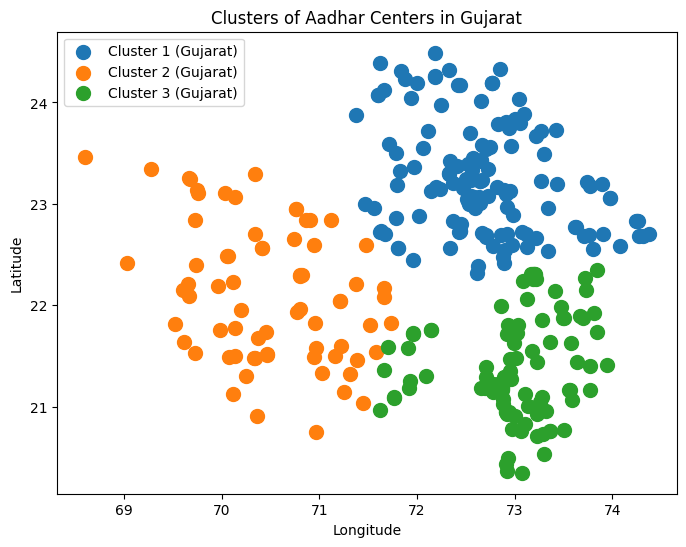

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


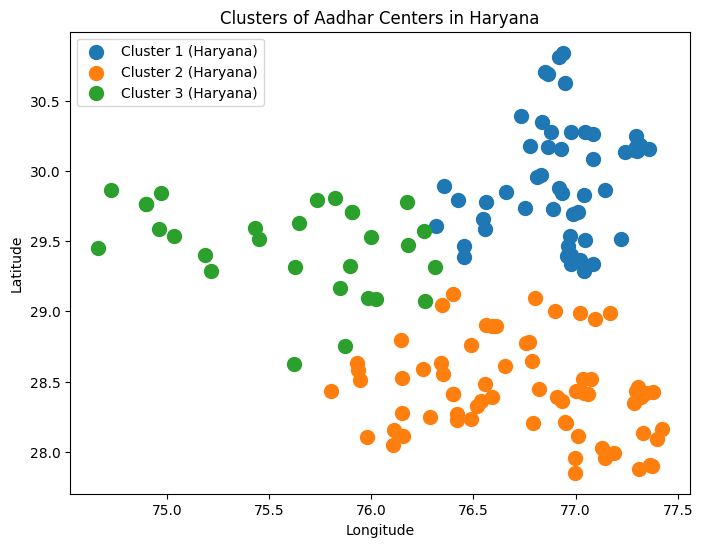

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


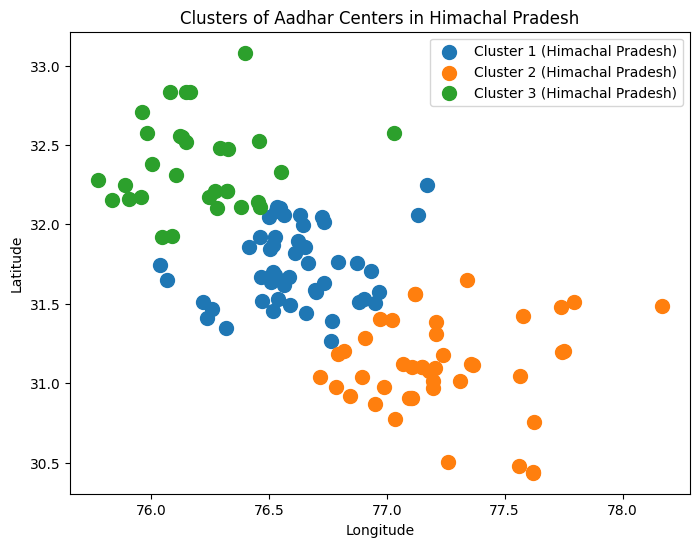

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


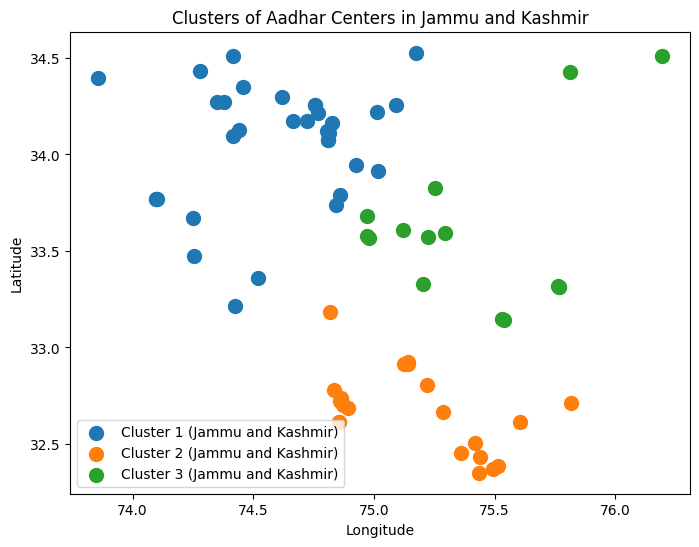

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


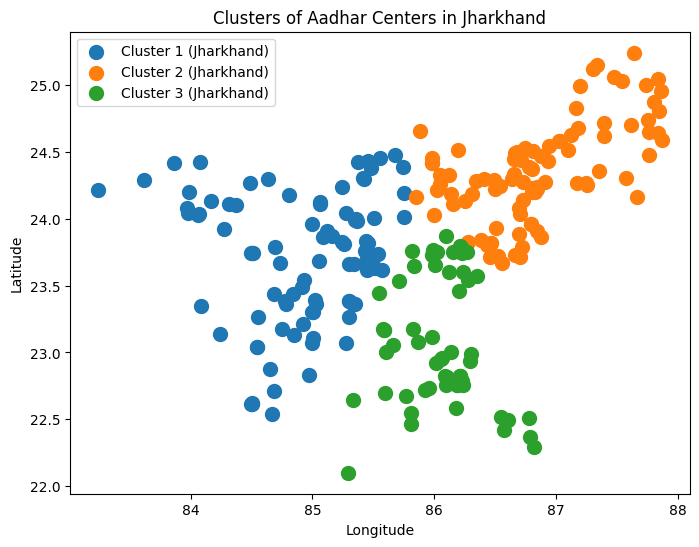

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


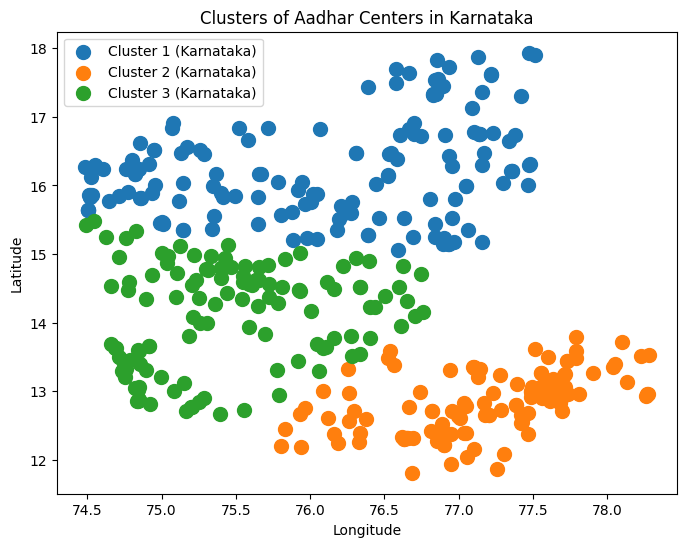

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


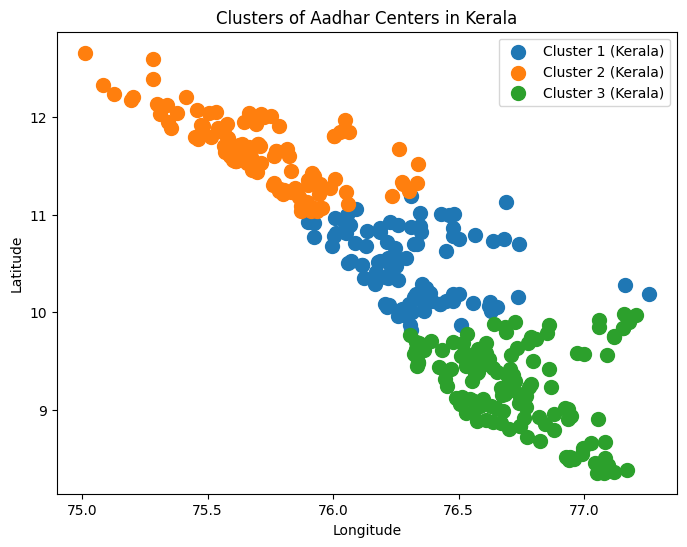

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


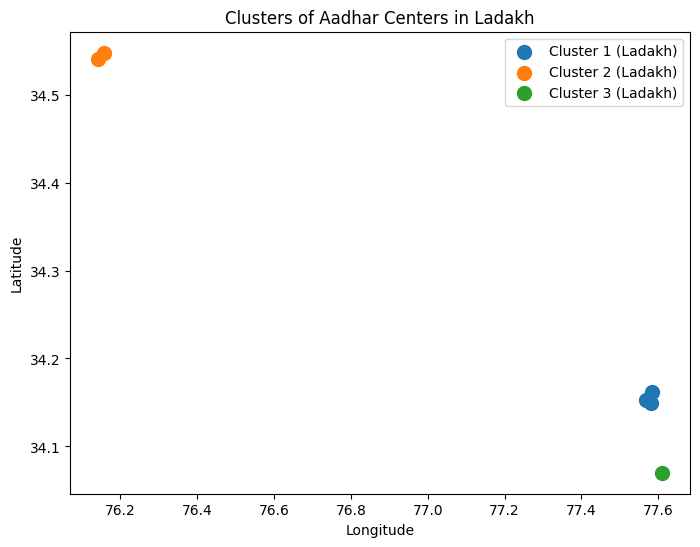

Not enough data points in Lakshadweep for clustering.


C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


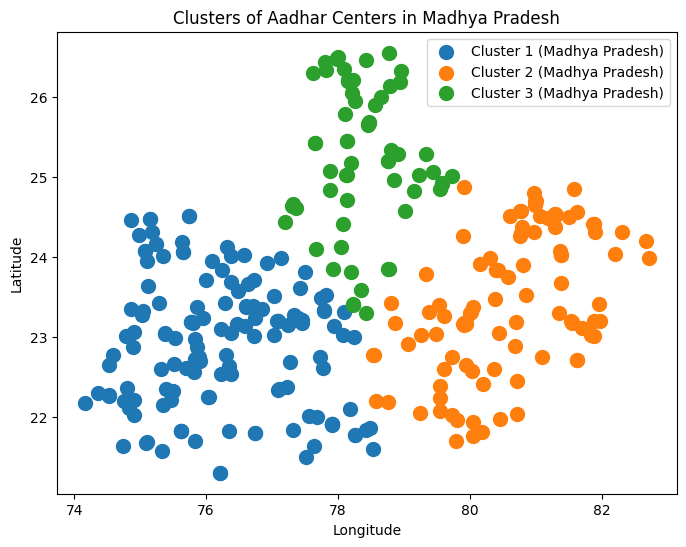

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


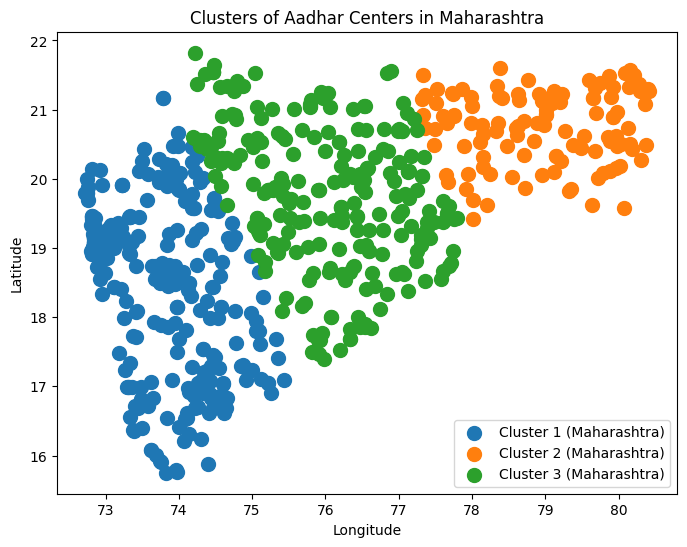

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


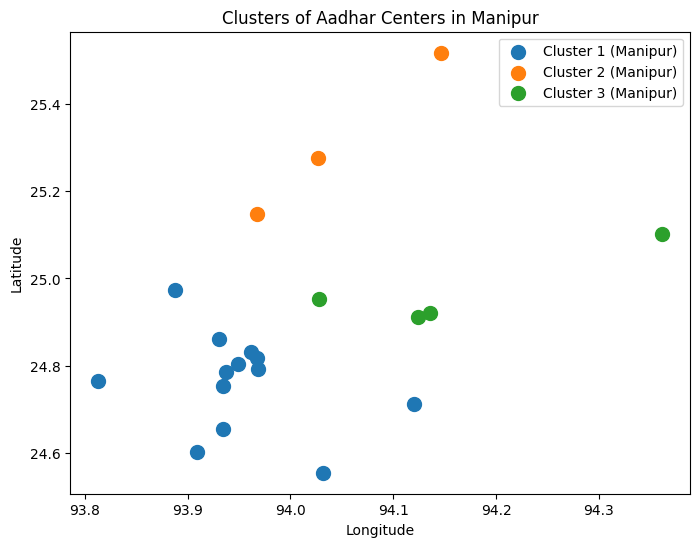

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


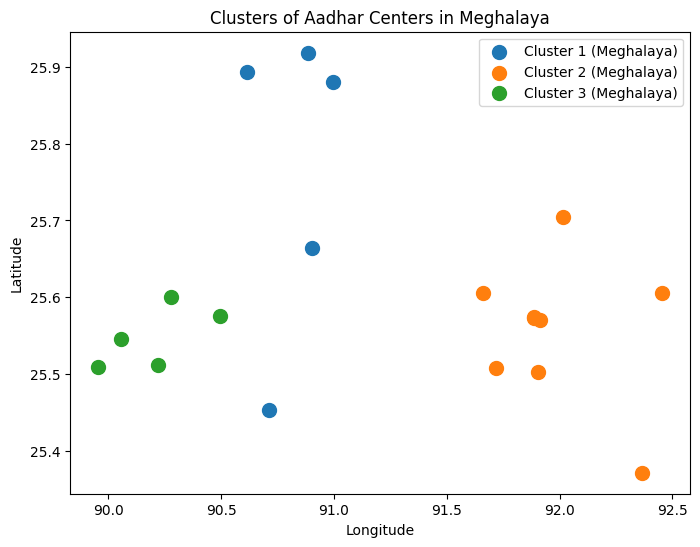

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


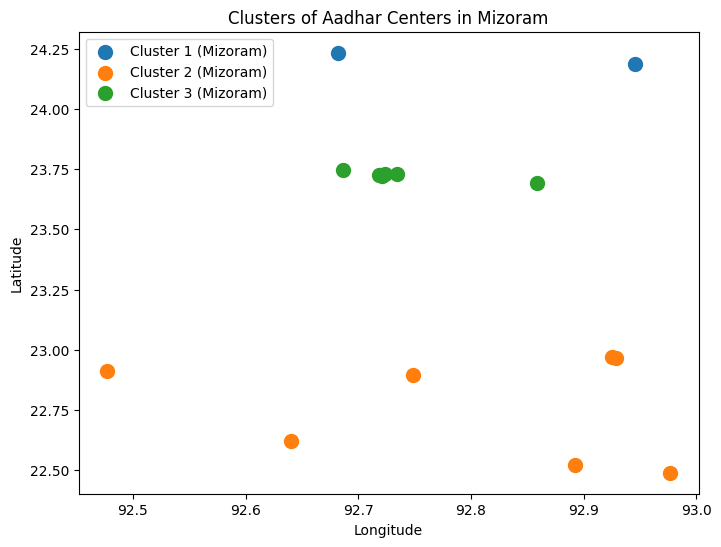

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


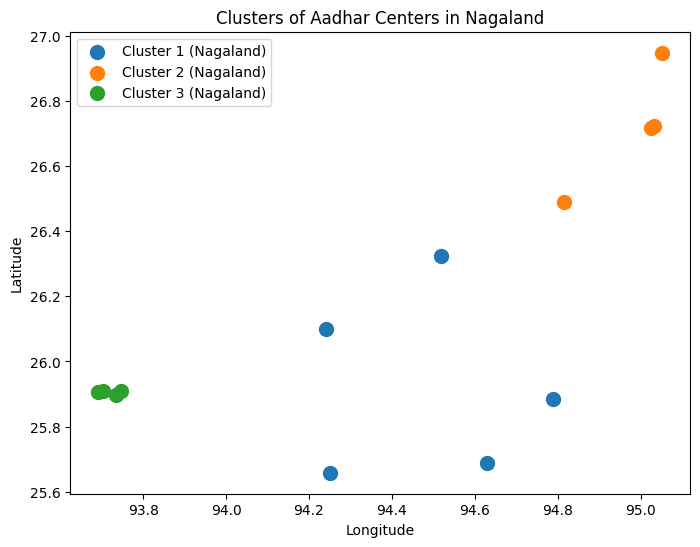

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


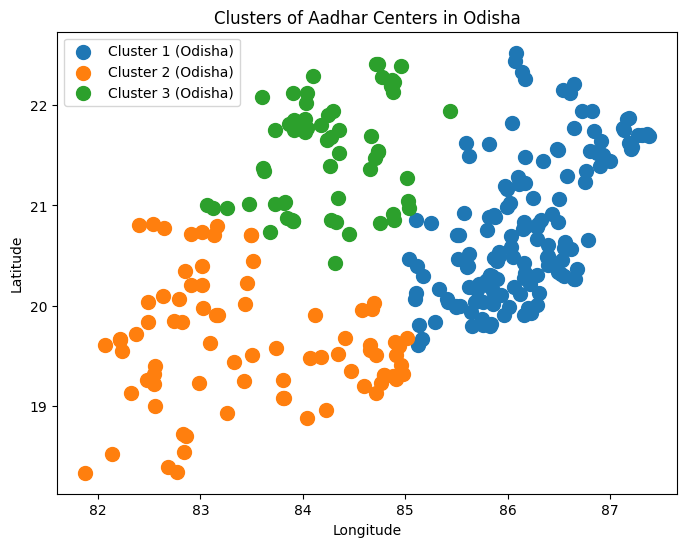

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


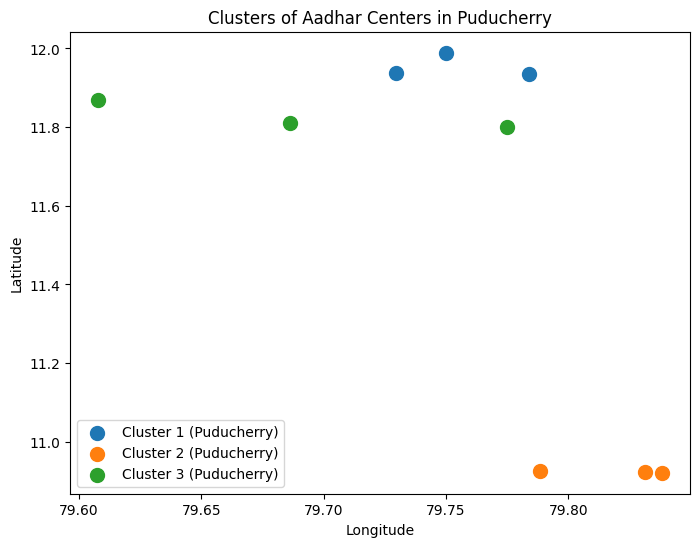

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


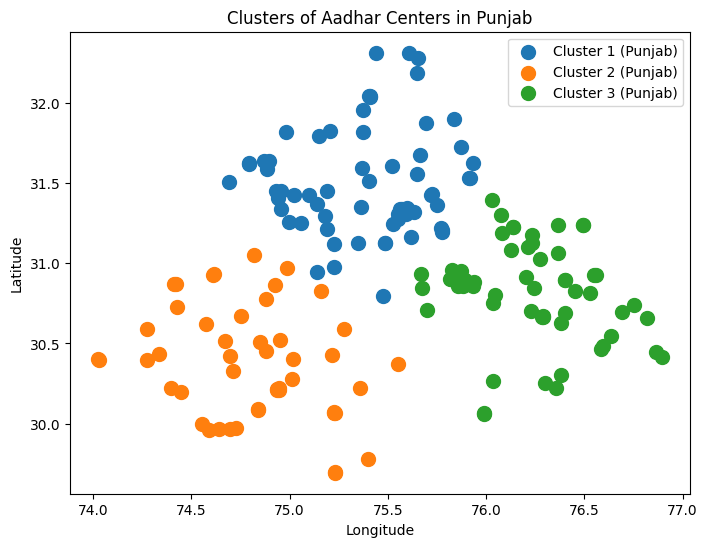

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


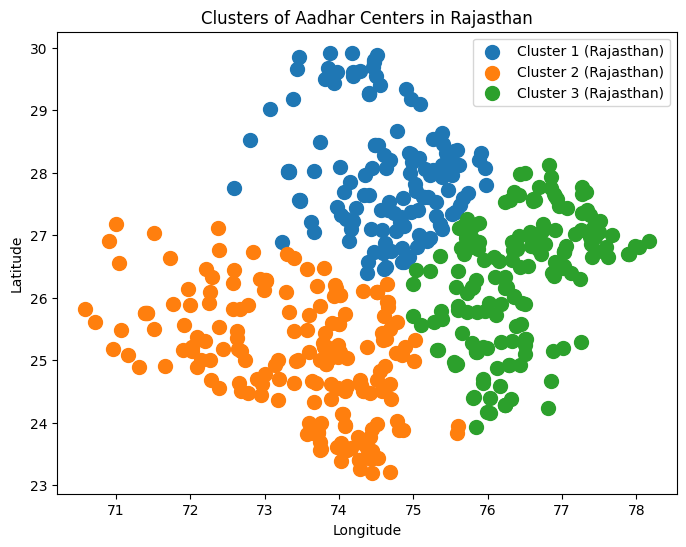

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


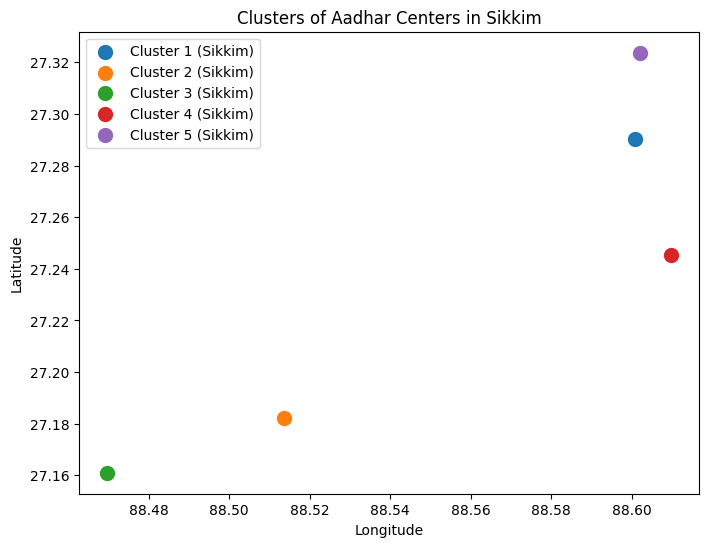

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


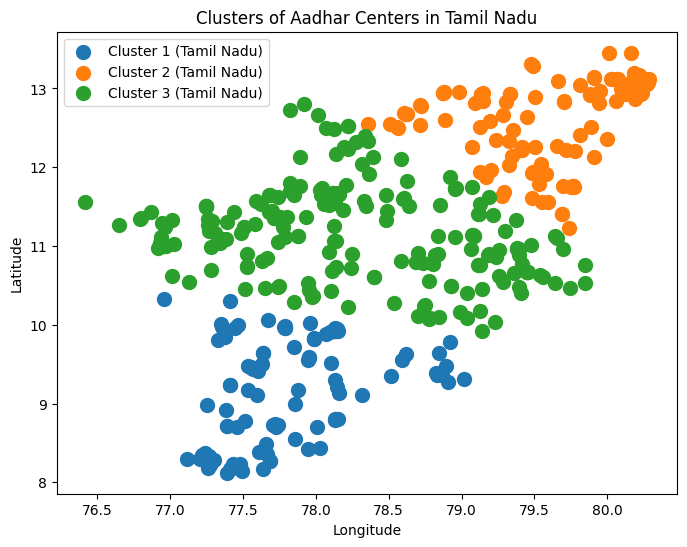

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


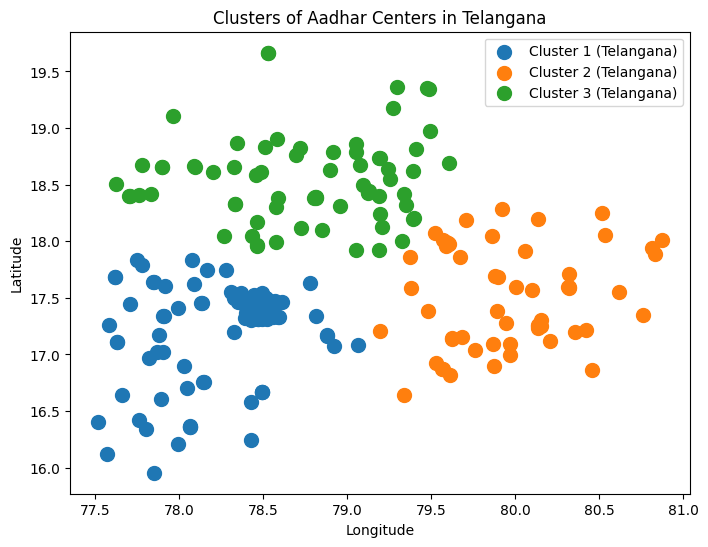

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


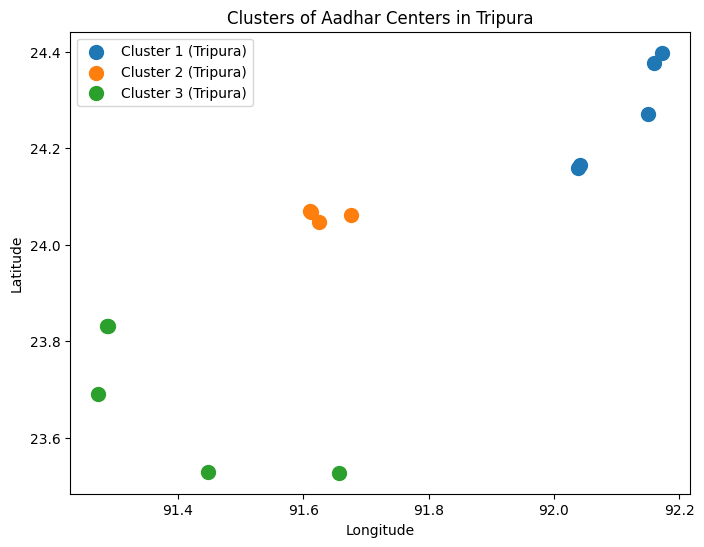

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


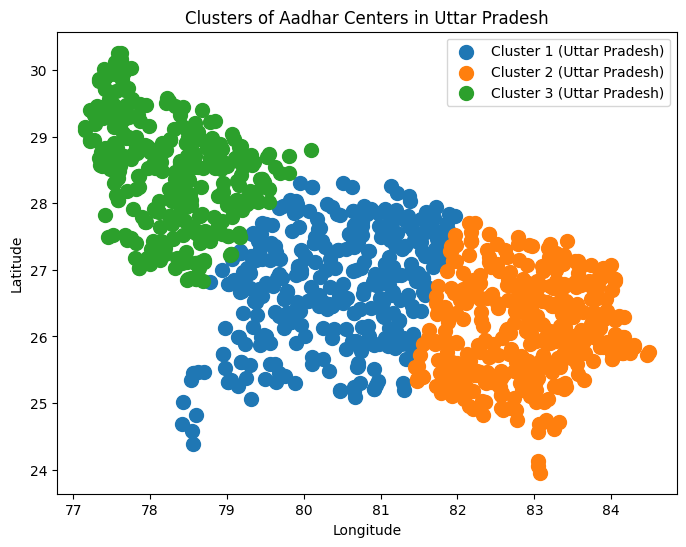

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


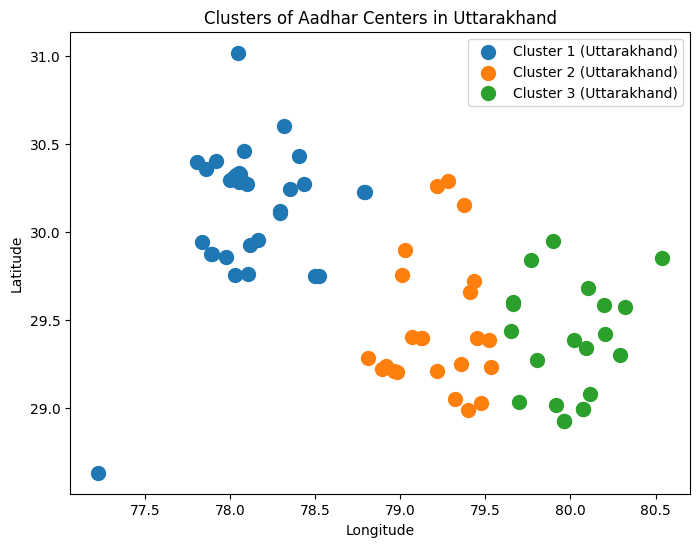

C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


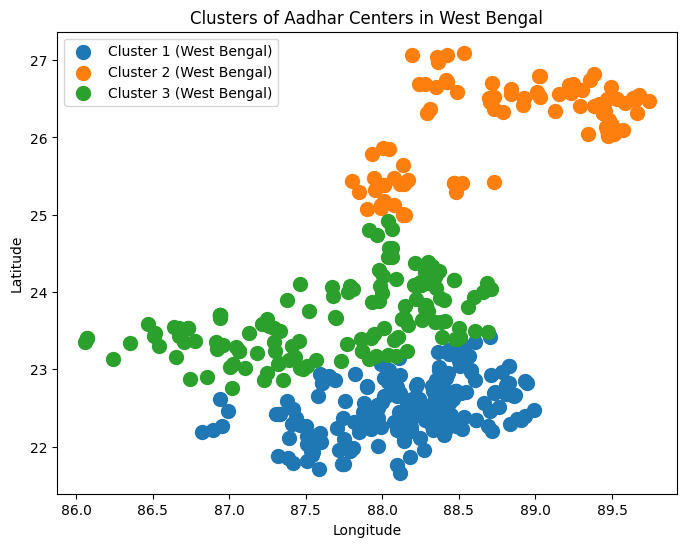

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load the CSV file
file_path = 'addhar_centers.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Step 2: Data Preprocessing
# If the dataset is large, consider taking a sample
sample_data = data.sample(frac=0.1)  # Adjust the fraction as per your need

# Grouping the data by 'state'
grouped_data = sample_data.groupby('state')

# Step 3: Clustering for Each State
for state, state_data in grouped_data:
    # Using only 'latitude' and 'longitude' for clustering
    X = state_data[['lat', 'long']]

    # Determine the number of clusters based on the number of data points
    n_data_points = len(X)
    
    if n_data_points < 3:
        print(f"Not enough data points in {state} for clustering.")
        continue

    if n_data_points < 6:
        n_clusters = n_data_points
    else:
        n_clusters = min(3, n_data_points // 2)  # Set a reasonable maximum

    # Applying K-Means to the dataset for this state
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    # Visualizing the clusters for this state
    plt.figure(figsize=(8, 6))
    for cluster in range(n_clusters):
        plt.scatter(X['long'][y_kmeans == cluster], X['lat'][y_kmeans == cluster], s=100, label=f'Cluster {cluster + 1} ({state})')
    plt.title(f'Clusters of Aadhar Centers in {state}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.show()


In [13]:
!pip install geopandas folium


     ---------------------------------------- 0.0/51.1 kB ? eta -:--:--
     ---------------------- --------------- 30.7/51.1 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 51.1/51.1 kB 869.6 kB/s eta 0:00:00
     ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
     -- ------------------------------------- 0.3/5.1 MB 5.8 MB/s eta 0:00:01
     ------ --------------------------------- 0.8/5.1 MB 10.2 MB/s eta 0:00:01
     ------------- -------------------------- 1.8/5.1 MB 16.0 MB/s eta 0:00:01
     -------------- ------------------------- 1.9/5.1 MB 11.0 MB/s eta 0:00:01
     ----------------- ---------------------- 2.3/5.1 MB 10.3 MB/s eta 0:00:01
     ------------------- -------------------- 2.6/5.1 MB 9.6 MB/s eta 0:00:01
     ---------------------- ----------------- 2.8/5.1 MB 9.1 MB/s eta 0:00:01
     -------------------------- ------------- 3.3/5.1 MB 8.9 MB/s eta 0:00:01
     --------------------------- ------------ 3.5/5.1 MB 8.5 MB/s eta

In [15]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import geopandas as gpd
import folium

# Step 1: Load the CSV file
file_path = 'addhar_centers.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Step 2: Data Preprocessing
# If the dataset is large, consider taking a sample
sample_data = data.sample(frac=0.1)  # Adjust the fraction as per your need

# Grouping the data by 'state'
grouped_data = sample_data.groupby('state')

# Create a folium map centered on India
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Initialize a GeoDataFrame to store cluster points
cluster_gdf = gpd.GeoDataFrame()

# Step 3: Clustering for Each State
for state, state_data in grouped_data:
    # Using only 'latitude' and 'longitude' for clustering
    X = state_data[['lat', 'long']]

    # Determine the number of clusters based on the number of data points
    n_data_points = len(X)

    if n_data_points < 3:
        print(f"Not enough data points in {state} for clustering.")
        continue

    if n_data_points < 6:
        n_clusters = n_data_points
    else:
        n_clusters = min(3, n_data_points // 2)  # Set a reasonable maximum

    # Applying K-Means to the dataset for this state
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    # Add the cluster points to the GeoDataFrame
    cluster_gdf = pd.concat([cluster_gdf, gpd.GeoDataFrame(geometry=gpd.points_from_xy(X['long'], X['lat']))])

# Plot the clusters on the folium map
for idx, row in cluster_gdf.iterrows():
    folium.CircleMarker(location=[row['geometry'].y, row['geometry'].x], radius=5, color='blue').add_to(m)

# Load the shapefile of India and add it to the map for context
india_shapefile = 'india_district_boundary.shp'  # Replace with your shapefile path
india_gdf = gpd.read_file(india_shapefile)
folium.GeoJson(india_gdf).add_to(m)

# Save the map to an HTML file or display it in the notebook
m.save('cluster_map.html')


C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

Not enough data points in Dadra and Nagar Haveli for clustering.


C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import folium

# Load your CSV file with existing Aadhar center data
file_path = 'addhar_centers.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Extract latitude and longitude as features for clustering
X = data[['lat', 'long']]

# Specify the number of clusters you want to create (you can adjust this)
n_clusters = 5

# Create a K-Means clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# Create a folium map centered on India
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Define colors for the clusters
cluster_colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF']  # Adjust as needed

# Plot the Aadhar center locations with cluster-specific colors
for cluster_id in range(n_clusters):
    cluster_data = data[data['cluster'] == cluster_id]
    for idx, row in cluster_data.iterrows():
        folium.CircleMarker(
            location=[row['lat'], row['long']],
            radius=5,
            color=cluster_colors[cluster_id],
            fill=True,
            fill_color=cluster_colors[cluster_id]
        ).add_to(m)

# Save the map to an HTML file or display it in the notebook
m.save('predicted_aadhar_centers.html')


C:\Users\akash\.conda\envs\new\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
import pandas as pd
import folium
import numpy as np

# Load your CSV file with existing Aadhar center data
file_path = 'addhar_centers.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Extract latitude and longitude as features for clustering
X = data[['lat', 'long']]

# Specify the number of clusters you want to create for existing data
n_existing_clusters = 1  # Only one cluster for existing data

# Create a folium map centered on India
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Define a color for the existing cluster (e.g., red)
existing_cluster_color = '#FF0000'

# Plot the existing Aadhar center locations with the existing cluster color
for idx, row in data.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=5,
        color=existing_cluster_color,
        fill=True,
        fill_color=existing_cluster_color
    ).add_to(m)

# Here, you can specify new clusters for predicted locations (you can adjust the number of clusters)
n_predicted_clusters = 1  # Only one cluster for predicted data

# Generate random latitude and longitude coordinates for predicted locations (replace this with your own prediction logic)
np.random.seed(42)
predicted_latitudes = np.random.uniform(20, 30, size=50)  # Example: Generate 50 random latitudes between 20 and 30 degrees
predicted_longitudes = np.random.uniform(70, 80, size=50)  # Example: Generate 50 random longitudes between 70 and 80 degrees

# Define a color for the predicted cluster (e.g., blue)
predicted_cluster_color = '#0000FF'

# Plot the predicted Aadhar center locations with the predicted cluster color
for lat, long in zip(predicted_latitudes, predicted_longitudes):
    folium.CircleMarker(
        location=[lat, long],
        radius=5,
        color=predicted_cluster_color,
        fill=True,
        fill_color=predicted_cluster_color
    ).add_to(m)

# Save the map to an HTML file or display it in the notebook
m.save('predicted_aadhar_centers2.html')


In [6]:
import geopandas as gpd
import pandas as pd
import rasterio
import rasterio.plot
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import contextily as ctx

# Load the georeferenced TIFF image of nightlight data
with rasterio.open('NTL/2022_India.tif') as src:
    # Read all three bands
    band1 = src.read(1)
    band2 = src.read(2)
    band3 = src.read(3)
    transform = src.transform

# Load the Aadhar centers CSV data
aadhar_centers = pd.read_csv('addhar_centers.csv')

# Convert the Aadhar centers DataFrame to a GeoDataFrame
aadhar_gdf = gpd.GeoDataFrame(
    aadhar_centers,
    geometry=gpd.points_from_xy(aadhar_centers.long, aadhar_centers.lat),
    crs='EPSG:4326'  # Assuming the coordinates are in WGS84
)

# Function to extract radiance values from all three bands
def extract_radiance(geo_df, raster_band, transform, raster_crs):
    """Extracts the radiance values for each point in the GeoDataFrame from the raster band."""
    radiance_values = []
    for point in geo_df.geometry.to_crs(raster_crs):
        row, col = rasterio.transform.rowcol(transform, point.x, point.y)
        radiance_values.append(raster_band[row, col])
    return radiance_values


# Extract radiance values for each band
# Extract radiance values for each band
aadhar_gdf['band1'] = extract_radiance(aadhar_gdf, band1, src.transform, src.crs)
aadhar_gdf['band2'] = extract_radiance(aadhar_gdf, band2, src.transform, src.crs)
aadhar_gdf['band3'] = extract_radiance(aadhar_gdf, band3, src.transform, src.crs)


# Normalize the radiance values
scaler = StandardScaler()
aadhar_gdf[['band1', 'band2', 'band3']] = scaler.fit_transform(
    aadhar_gdf[['band1', 'band2', 'band3']]
)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5)  # Adjust the number of clusters as needed
aadhar_gdf['cluster'] = kmeans.fit_predict(aadhar_gdf[['band1', 'band2', 'band3']])

# Load the .shp file to get the boundaries of India's districts
india_districts = gpd.read_file('india_district_boundary.shp')

# Load the census data
census_data = pd.read_csv('india-districts-census-2011.csv')

# Merge the census data with the district shapefile
# This step assumes that there is a common key between the census data and the shapefile
districts_with_census = india_districts.merge(census_data, left_on='key_in_shapefile', right_on='key_in_census')

# Spatial join between Aadhar centers and districts to assign each center to a district
aadhar_with_districts = gpd.sjoin(aadhar_gdf, districts_with_census, how='left', op='within')

# Visualization of the clusters on the map
fig, ax = plt.subplots(figsize=(10, 10))
districts_with_census.plot(ax=ax, color='white', edgecolor='black')
aadhar_with_districts.plot(column='cluster', ax=ax, markersize=5, cmap='viridis', legend=True)

# Add basemap
ctx.add_basemap(ax, crs=aadhar_with_districts.crs.to_string())

plt.show()


c:\Users\akash\.conda\envs\gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyError: 'key_in_census'